Shauna Smith

Bellevue University-DSC630

Professor: Andrew Hua

Week 9 - "Milestone 4 - finalizing your results"

# Objective

In Milestone 4, most of the technical work for the project should be done. You should include the information from Milestone 3 and address the following additional items:

Explain your process for prepping the data

Build and evaluate at least one model

Interpret your results

Begin to formulate a conclusion/recommendations

Please submit Milestone 4 in Blackboard under the group submission link.
This should be submitted through the group assignment submission regardless if it is an independent project or multi-person group. Also, post your Milestone 4 in your Teams project folder for peer reviews.

In [1]:
import pandas as pd

In [314]:
df=pd.read_csv(r"C:\Users\Shaun\OneDrive\Documents\DSC630\exams.csv")

In [315]:
df=df.drop(['gender','race/ethnicity','parental level of education'], axis=1)

In [5]:
# Confirming if any missing data
df.isnull().sum()

lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scores compared to lunch types')

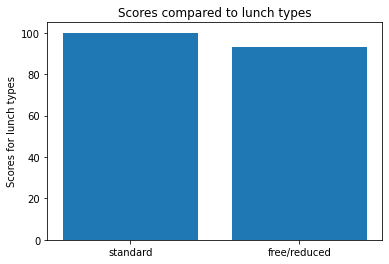

In [7]:
x=df.lunch
y=df['math score']

plt.bar(x,y)
plt.ylabel("Scores for lunch types")
plt.title("Scores compared to lunch types")

Text(0.5, 1.0, 'Scores compared to lunch types')

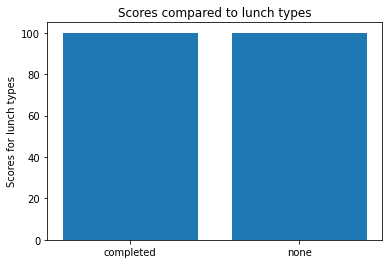

In [9]:
x=df['test preparation course']
y=df['math score']

plt.bar(x,y)
plt.ylabel("Scores for lunch types")
plt.title("Scores compared to lunch types")

In [919]:
df.head()

,lunch,test preparation course,math score,reading score,writing score,Scored_Sums
0,standard,completed,59,70,78,207
1,standard,none,96,93,87,276
2,free/reduced,none,57,76,77,210
3,free/reduced,none,70,70,63,203
4,standard,none,83,85,86,254


In [13]:
#create a combined scores number for analysis
import numpy as np

In [316]:
df['Scored_Sums']=df['math score']+df['reading score']+df['writing score']
df.head(1)

,lunch,test preparation course,math score,reading score,writing score,Scored_Sums
0,standard,completed,59,70,78,207


In [22]:
# Create dummies for categorical
dummydf=pd.get_dummies(df, columns=['lunch','test preparation course'])

In [31]:
dummydf.head(1)

,math score,reading score,writing score,Scored_Sums,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,59,70,78,207,0,1,1,0


In [27]:
#Rename for ease
ndf=dummydf.rename(columns={'math score':'math','reading score':'reading','writing score':'writing',
                            'Scored_Sums':'total','lunch_free/reduced':'free_lunch','lunch_standard':'lunch',
                           'test preparation course_completed':'prep','test preparation course_none':'no_prep'})

In [33]:
ndf.head(1)

,math,reading,writing,total,free_lunch,lunch,prep,no_prep
0,59,70,78,207,0,1,1,0


In [75]:
#Preview for correlations as intrests on score totals viewed from 2 combined perspectives
import seaborn as sns

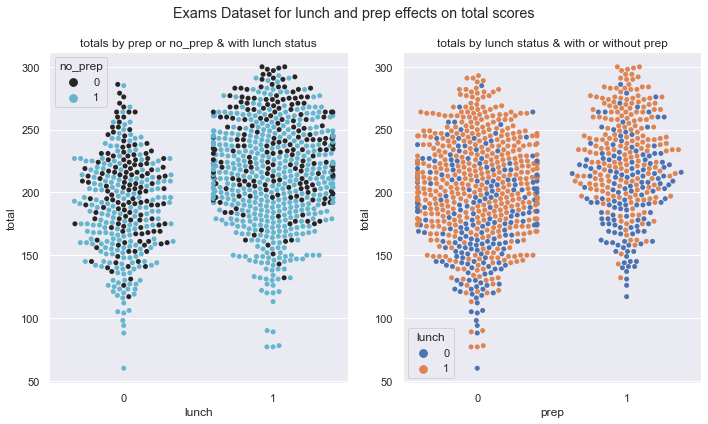

In [921]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle('Exams Dataset for lunch and prep effects on total scores')

sns.swarmplot(data=ndf, x='lunch', y='total',hue="no_prep", color='c', ax=axes[0])
axes[0].set_title('totals by prep or no_prep & with lunch status')

sns.swarmplot(data=ndf, x="prep", y="total", hue="lunch", ax=axes[1]);
axes[1].set_title('totals by lunch status & with or without prep');

plt.tight_layout();

In [693]:
#create working df for model
wdf=df.drop(columns=['math score','reading score','writing score'])
wdf.head(3)

,lunch,test preparation course,Scored_Sums
0,standard,completed,207
1,standard,none,276
2,free/reduced,none,210


In [694]:
wdf['lunch'].mask(wdf['lunch'] == 'standard', 1, inplace=True)
wdf['lunch'].mask(wdf['lunch'] == 'free/reduced', 2, inplace=True)

In [695]:
wdf.head(3)

,lunch,test preparation course,Scored_Sums
0,1,completed,207
1,1,none,276
2,2,none,210


In [696]:
wdf["test preparation course"].mask(wdf["test preparation course"] == "completed",1, inplace=True)
wdf["test preparation course"].mask(wdf["test preparation course"] == "none",2, inplace=True)

wdf.head(3)

,lunch,test preparation course,Scored_Sums
0,1,1,207
1,1,2,276
2,2,2,210


In [697]:
wdf['Scored_Sums'].unique()

array([207, 276, 210, 203, 254, 179, 245, 165, 228, 212, 152, 226, 213,
       161, 145, 123, 260, 247, 194, 214, 263, 272, 229, 195, 230, 246,
       223, 222, 104, 164, 218, 206, 252, 140, 235, 240, 209, 162, 199,
       268, 224, 167, 237, 216, 241, 267, 187, 275, 243, 231, 234, 196,
       105, 175, 242,  89, 158, 155, 264, 183, 249, 279, 139, 251, 288,
       184, 262, 193, 200, 132, 284, 239, 250, 217, 248, 177, 293, 274,
       182, 261, 219, 168, 169, 144, 190, 192, 233, 256, 225, 198, 290,
       244, 149, 156, 146, 215, 126, 201, 221, 185, 285, 134, 211, 232,
       189, 174, 257, 173, 286, 277, 180, 220, 160, 208, 170, 181, 278,
       172,  60, 238, 269, 166, 227, 178, 120, 150, 186, 204, 113, 171,
       289, 191, 147, 266, 148, 280, 283, 130, 197, 176, 188, 131, 259,
       202, 121, 282, 151,  77, 300, 236, 291, 271, 142, 136, 270, 127,
       137, 258, 112, 294, 154, 205,  90, 255, 141, 153, 163,  88, 299,
       128,  94, 157, 159, 143, 138, 116, 253, 118, 119, 133,  9

In [698]:
wdf['Scored_Sums'].agg(['min', 'max'])

min     60
max    300
Name: Scored_Sums, dtype: int64

In [699]:
wdf.loc[(wdf['Scored_Sums'] >= 120), 'Scored_Sums'] = 1

In [700]:
wdf['Scored_Sums'].unique()

array([  1, 104, 105,  89,  60, 113,  77, 112,  90,  88,  94, 116, 118,
       119,  98, 117, 106,  78], dtype=int64)

In [701]:
wdf.loc[(wdf['Scored_Sums'] != 1), 'Scored_Sums'] = 2

In [702]:
wdf['Scored_Sums'].unique()

array([1, 2], dtype=int64)

In [703]:
wdf = wdf.rename({'test preparation course': 'prep', 'Scored_Sums': 'scores'}, axis=1)
wdf.head(3)

,lunch,prep,scores
0,1,1,1
1,1,2,1
2,2,2,1


In [704]:
#the dependent variable
y=wdf.scores.values
y.shape

(1000,)

In [705]:
#the independent variables
x=wdf.drop('scores', axis=1)

In [706]:
x=x.astype('int')

In [707]:
x.shape

(1000, 2)

In [708]:
#Start model development
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [709]:
from sklearn.model_selection import train_test_split

In [845]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [846]:
#create model
from sklearn.ensemble import RandomForestClassifier

In [847]:
model=RandomForestClassifier(n_estimators=10, random_state=42, oob_score=True)

In [848]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

In [849]:
predictions=model.predict(x_test)

In [850]:
#Checking accuracy and feature importance
from sklearn import metrics

In [851]:
print("The accuracy of the model = ", metrics.accuracy_score(y_test, predictions))

The accuracy of the model =  0.99


In [932]:
listedFeatures=list(x.columns)
feature_importance=pd.Series(model.feature_importances_,index=listedFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on scores using the RFC: ")
print(feature_importance)

The following shows the rates of features impact on scores using the RFC: 
prep     0.54184
lunch    0.45816
dtype: float64


In [898]:
model.oob_score_

0.98

In [941]:
#Showing the Random Forest Model diagram of selected feature 'prep' 
from sklearn import tree
fn=x.columns
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(1,1), dpi=10000)
tree.plot_tree(model.estimators_[0],
               feature_names=fn, 
               filled=True);
fig.savefig('random_forrest_individualtree.png')

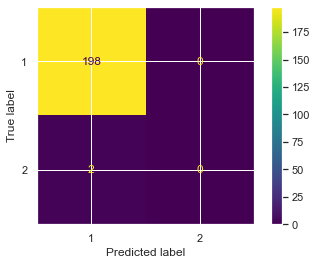

In [930]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

CM= confusion_matrix(y_test, predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=model.classes_)
display.plot()

In [931]:
f1_score(y_test,predictions)

0.9949748743718593

In [857]:
from sklearn.metrics import plot_roc_curve
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

In [858]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

SVC(random_state=42)

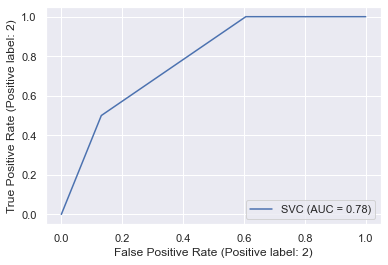

In [859]:
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)

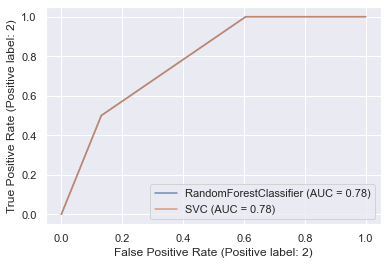

In [860]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

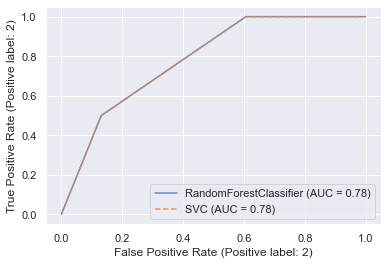

In [861]:
rfc = RandomForestClassifier(n_estimators=10, random_state=20)
rfc.fit(x_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8,linestyle='--')

In [862]:
! pip install imblearn --quiet

In [863]:
#attempts at fixing imbalanced data
from statistics import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

In [864]:
#Create BRF model
BRF = BalancedRandomForestClassifier(n_estimators=150, random_state=2)

In [934]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#score for the BRF model
scores = cross_validate(BRF, x, y, scoring=scoring, cv=cv)
print("The resulting mean scores for the Balanced Random Forest Model are as follows:")
print('Mean f1: %.2f' % mean(scores['test_f1']))
print('Mean recall: %.2f' % mean(scores['test_recall']))
print('Mean precision: %.2f' % mean(scores['test_precision']))

The resulting mean scores for the Balanced Random Forest Model are as follows:
Mean f1: 0.89
Mean recall: 0.81
Mean precision: 0.99


In [902]:
#Random spilt of dataset to test and train with
xx_train, xx_test, yy_train, yy_test = train_test_split(x, y, test_size=0.1, stratify=y)
#fit BRF
BRF.fit(xx_train, yy_train)
#predict
y_pred = BRF.predict(xx_test)
#accuracy score
accuracy_score(yy_test,y_pred)

0.78

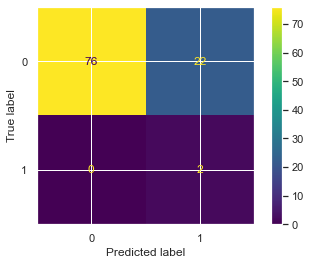

In [903]:
#Create confusion matrix from BRF model
conm=confusion_matrix(yy_test, y_pred, labels=BRF.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix=conm)
fig.plot()

In [890]:
balancedlist=list(x.columns)
balanced_feature_importance=pd.Series(BRF.feature_importances_,index=listedFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on scores from the Balanced Random Forest: ")
print(balanced_feature_importance)

The following shows the rates of features impact on scores from the Balanced Random Forest: 
lunch    0.513944
prep     0.486056
dtype: float64


In [891]:
#Testing a DecisionTree model
from sklearn.tree import DecisionTreeClassifier

In [892]:
Trees=wdf

In [893]:
from sklearn.preprocessing import LabelEncoder

In [894]:
LElunch=LabelEncoder()
LEprep=LabelEncoder()

Trees.lunch=LElunch.fit_transform(Trees.lunch)
Trees.prep=LEprep.fit_transform(Trees.prep)

In [895]:
X=Trees.drop(columns='scores')
Y=Trees.scores
X.shape,Y.shape

((1000, 2), (1000,))

In [905]:
dtc=DecisionTreeClassifier()

In [906]:
dtc.fit(X,Y)

DecisionTreeClassifier()

In [907]:
dtc.score(X,Y)

0.982

In [908]:
X_test=X.sample(n=200)

In [909]:
predictionTree=dtc.predict(X_test)
predictionTree[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [910]:
#Accuracy score for Classification purposes
from sklearn.metrics import accuracy_score

In [911]:
Y_test=Y.sample(n=200)
accuracy_score(Y_test,predictionTree)

0.98

In [912]:
priority=pd.Series(dtc.feature_importances_,index=listedFeatures).sort_values(ascending=False)

In [933]:
print("The following shows the rates of each features impact on scores from the dtc model: ")
print(priority)

The following shows the rates of each features impact on scores from the dtc model: 
prep     0.573851
lunch    0.426149
dtype: float64


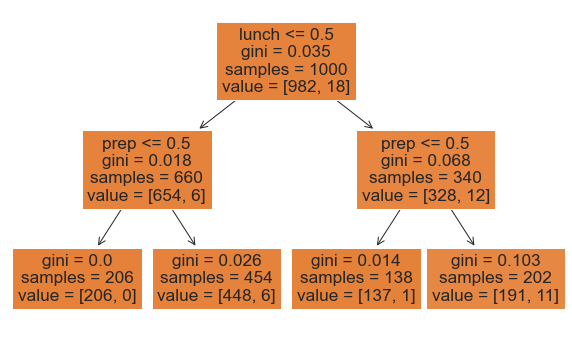

In [924]:
#Decision Tree Model diagram for selected feature 'prep'
fig = plt.figure(figsize=(10,6))
_ = tree.plot_tree(dtc,feature_names=X.columns,filled=True)

In [915]:
# Create confusion matrix & f-1 score for DTC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [916]:
confusion_matrix(Y_test, predictionTree)

array([[196,   0],
       [  4,   0]], dtype=int64)

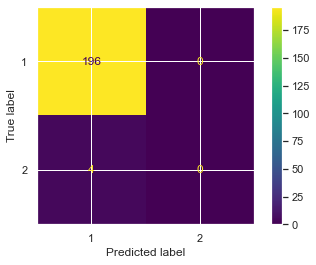

In [917]:
cm = confusion_matrix(Y_test, predictionTree, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()

In [918]:
f1_score(Y_test,predictionTree)

0.98989898989899